# Machine learning foundation

## Regularization and Gradient descent

### Introduction

In [1]:
import os
data_path=['data']

#### import the data

In [2]:
import pandas as pd
import numpy as np

filepath=os.sep.join(data_path+['X_Y_Sinusoid_Data.csv'])
data=pd.read_csv(filepath)

X_real=np.linspace(0, 1.0, 100)
Y_real=np.sin(2*np.pi*X_real)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0, 0.5, 'y data'), Text(0.5, 0, 'x data')]

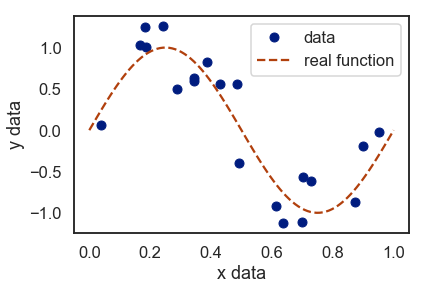

In [4]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot the noisy
ax=data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

#### Use PolynomialFeatures

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'y data'), Text(0.5, 0, 'x data')]

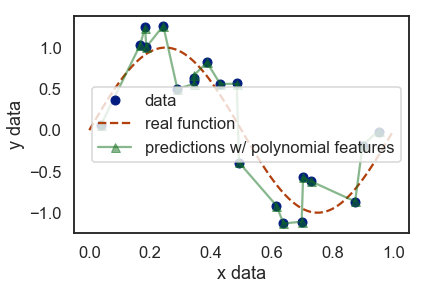

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# set up the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr=LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr=lr.fit(X_poly, Y_data)
Y_pred=lr.predict(X_poly)

#Plot the result 
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()

ax=plt.gca()
ax.set(xlabel='x data', ylabel='y data')

#### Perform regression using ridge regression and lasso regression

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0, 0.5, 'y data'), Text(0.5, 0, 'x data')]

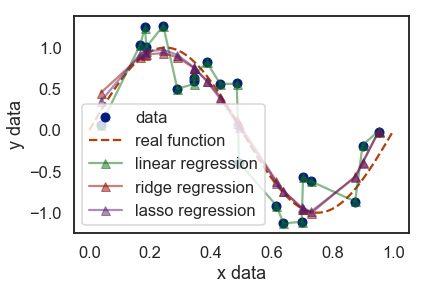

In [6]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

## the ridge regression model
rr=Ridge(alpha=0.001)
rr=rr.fit(X_poly, Y_data)
Y_pred_rr=rr.predict(X_poly)

## the lasso regression model
lassor=Lasso(alpha=0.0001)
lassor=lassor.fit(X_poly, Y_data)
Y_pred_lassor=lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lassor, label='lasso regression', marker='^', alpha=.5)

plt.legend()
ax=plt.gca()
ax.set(xlabel='x data', ylabel='y data')

In [7]:
# let's look at the coefficient for each model

coefficients=pd.DataFrame()
coefficients['linear regression']=lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()

coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.777551e+13,2.169397,2.167284
std,6.031941e+13,2.900278,4.706731
min,1.619371e+07,0.000000,0.000000
25%,3.416390e+12,0.467578,0.000000
50%,3.621188e+13,1.017272,0.252181
75%,1.070540e+14,2.883507,1.641353
max,1.655347e+14,12.429635,20.176708


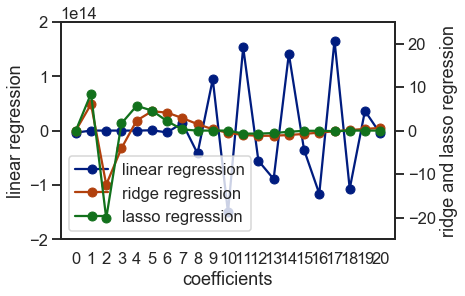

In [8]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

#### Feature encoding

In [9]:
filepath=os.sep.join(data_path+['Ames_Housing_Sales.csv'])
data=pd.read_csv(filepath, sep=',')

In [10]:
one_hot_encode_cols=data.dtypes[data.dtypes==np.object].index.tolist()

In [11]:
for col in one_hot_encode_cols:
    data[col]=pd.Categorical(data[col])

data=pd.get_dummies(data, columns=one_hot_encode_cols)

In [12]:
data.shape

(1379, 295)

Split the data into training and test set

In [13]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(data, test_size=0.3, random_state=42)

In [14]:
mask=data.dtypes==np.float
float_cols = data.columns[mask]

In [15]:
skew_limit=0.75
skew_vals=train[float_cols].skew()

In [16]:
skew_cols=(skew_vals
           .sort_values(ascending=False)
          .to_frame()
          .rename(columns={0:'Skew'})
          .query('abs(Skew)>{0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


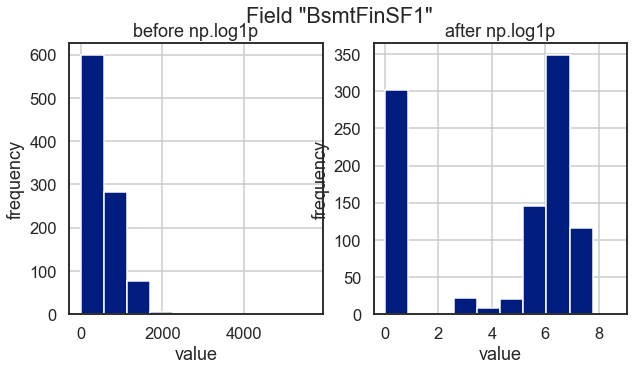

In [17]:
# Let's look at what happens to one of these features when we apply np.log1p visually
field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better

In [18]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing

In [19]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

#### RMSE function 

In [20]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, yprediction):
    return np.sqrt(mean_squared_error(ytrue,yprediction))

In [22]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(X_train, y_train)

lr_rmse=rmse(y_test, lr.predict(X_test))

print(lr_rmse)

306369.6834231709


D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


[(0, 582933.0),
 Text(0, 0.5, 'Predicted price'),
 (0, 582933.0),
 Text(0.5, 0, 'Actual price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

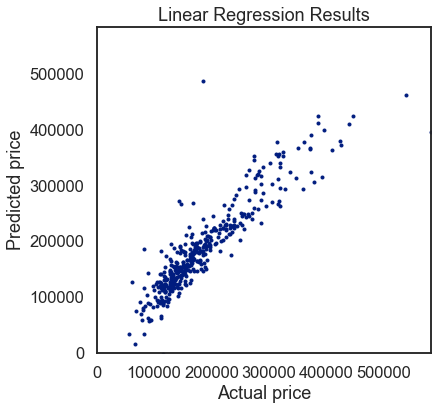

In [24]:
f=plt.figure(figsize=(6,6))

ax=plt.axes()

ax.plot(y_test, lr.predict(X_test),
       marker='o', ls='', ms=3.0)

lim=(0, y_test.max())

ax.set(xlabel='Actual price',
      ylabel='Predicted price',
      xlim=lim,
      ylim=lim,
      title='Linear Regression Results')

#### Ridge regression reduce the magniturde of the coefficients

In [28]:
from sklearn.linear_model import RidgeCV

alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV=RidgeCV(alphas=alphas,
               cv=4).fit(X_train, y_train)

ridgeCV_rmse=rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32169.176205672495


In [27]:
from sklearn.linear_model import Ridge

alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

for alpha in alphas:
    ridgelr=Ridge(alpha=alpha).fit(X_train, y_train)
    ridgelr_rmse=rmse(y_test, ridgelr.predict(X_test))
    print("alpha {}: rmse {}".format(alpha, ridgelr_rmse))

alpha 0.005: rmse 35743.14210613175
alpha 0.05: rmse 36688.091241373346
alpha 0.1: rmse 36358.702111911785
alpha 0.3: rmse 35420.78796674667
alpha 1: rmse 33997.12606632631
alpha 3: rmse 32960.47214426085
alpha 5: rmse 32635.63918043008
alpha 10: rmse 32304.40696443635
alpha 15: rmse 32169.176205672495
alpha 30: rmse 32084.830459091078
alpha 80: rmse 32423.632873527262


#### Lasso Regression use L1 regularization to selectively shrink som ecoefficients

In [29]:
from sklearn.linear_model import LassoCV

alphas2=np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV=LassoCV(alphas=alphas2, 
                max_iter=5e4,
               cv=3).fit(X_train, y_train)

lassoCV_rmse=rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

0.0005 39257.393991448225


In [48]:
## How many of these features remain non-zero
print('of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), len(lassoCV.coef_.nonzero()[0])))

of 294 coefficients, 273 are non-zero with Lasso.


Try the elastic net

In [54]:
from sklearn.linear_model import ElasticNetCV

l1_ratios=np.linspace(0.1,0.9, 9)

elasticNetCV=ElasticNetCV(alphas=alphas2,
                         l1_ratio=l1_ratios,
                         max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse=rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_,elasticNetCV_rmse)

0.0005 0.1 35001.234296074595


compare the RMSE calculation from all models is easiest in a table

In [55]:
rmse_vals=[lr_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels=['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df=pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0:'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,39257.393991
ElasticNet,35001.234296


we can make a plot of actual vs predicited housing prices as before

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

[Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 0, 'Actual Price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

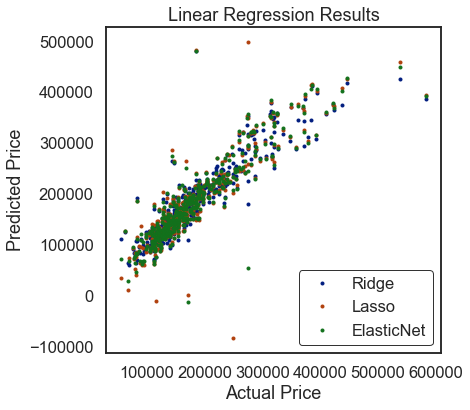

In [56]:
f=plt.figure(figsize=(6,6))
ax=plt.axes()

labels=['Ridge', 'Lasso', 'ElasticNet']

models=[ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
           marker='o', ls='', ms=3.0, label=lab)
    
leg=plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
      ylabel='Predicted Price',
      title='Linear Regression Results')

#### Stochastic Gradient descent

In [61]:
## Import SGDRegressor and prepare the parametes

from sklearn.linear_model import SGDRegressor

model_parameters_dict={
    'Linear': {'penalty': 'none'},
    'Lasso':{'penalty':'l2',
            'alpha':lassoCV.alpha_},
    'Ridge':{'penalty':'l1',
            'alpha': ridgeCV_rmse},
    'ElasticNet':{'penalty':'elasticnet',
                 'alpha':elasticNetCV.alpha_,
                 'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses={}
for modellabel, parameters in model_parameters_dict.items():
    ## following notation passes the dict items as argument
    SGD=SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel]=rmse(y_test, SGD.predict(X_test))
    
rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df    

,RMSE,RMSE-SGD
Linear,306369.683423,4.129992e+15
Ridge,32169.176206,9.437405e+14
Lasso,39257.393991,1.914238e+15
ElasticNet,35001.234296,1.565235e+16


In [62]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,306369.683423,4.129992e+15,81284.420076
Ridge,32169.176206,9.437405e+14,81080.510714
Lasso,39257.393991,1.914238e+15,77903.857142
ElasticNet,35001.234296,1.565235e+16,86308.305402


Scale the training data

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

new_rmses={}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,306369.683423,4.129992e+15,81284.420076,34775.529198
Ridge,32169.176206,9.437405e+14,81080.510714,77722.587933
Lasso,39257.393991,1.914238e+15,77903.857142,36638.295045
ElasticNet,35001.234296,1.565235e+16,86308.305402,34643.344956


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-2, **parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled,RMSE-SGD-scaled-learningrate
Linear,306369.683423,4.129992e+15,81284.420076,34775.529198,34730.433346
Ridge,32169.176206,9.437405e+14,81080.510714,77722.587933,77697.562421
Lasso,39257.393991,1.914238e+15,77903.857142,36638.295045,35791.089818
ElasticNet,35001.234296,1.565235e+16,86308.305402,34643.344956,34622.438585


## Regularization Lab

In [68]:
import numpy as np
import pandas as pd
from helper import boston_dataframe

np.set_printoptions(precision=3, suppress=True)

### Load in boston data

In [69]:
boston =boston_dataframe(description=True)
boston_data=boston[0]
boston_description=boston[1]

### Data Standardization

#### Generate X and y:

In [72]:
y_col='MEDV'

X=boston_data.iloc[:, :-1]
y=boston_data[y_col]

#### import, fit and transform using StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
X_ss=s.fit_transform(X)

#### confirm standard scaling

In [84]:
np.mean(X_ss, axis=0)

array([-0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.])

In [86]:
np.var(X_ss, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Coefficient without scaling

In [87]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

y_col='MEDV'

X=boston_data.iloc[:, :-1]
y=boston_data[y_col]

In [88]:
lr.fit(X,y)
print(lr.coef_)

[ -0.108   0.046   0.021   2.687 -17.767   3.81    0.001  -1.476   0.306
  -0.012  -0.953   0.009  -0.525]


#### Apply StandardScaler

In [92]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
X_ss=s.fit_transform(X)

lr2=LinearRegression().fit(X_ss, y)
print(lr2.coef_)

[-0.928  1.082  0.141  0.682 -2.057  2.674  0.019 -3.104  2.662 -2.077
 -2.061  0.849 -3.744]


#### The most impactful feature

In [106]:
pd.DataFrame({"Feature":X.columns.values, "coefficients": lr.coef_, "coefficients after scaling":lr2.coef_}).sort_values(by="coefficients after scaling", key=lambda x:-abs(x))

,Feature,coefficients,coefficients after scaling
12,LSTAT,-0.524758,-3.743627
7,DIS,-1.475567,-3.104044
5,RM,3.809865,2.674230
8,RAD,0.306049,2.662218
9,TAX,-0.012335,-2.076782
10,PTRATIO,-0.952747,-2.060607
4,NOX,-17.766611,-2.056718
1,ZN,0.046420,1.081569
0,CRIM,-0.108011,-0.928146
11,B,0.009312,0.849268


### Lasso with and without scaling

In [108]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

#### Create polynomial features

In [110]:
pf=PolynomialFeatures(degree=2, include_bias=False)
X_pf=pf.fit_transform(X)

X_pf_ss=s.fit_transform(X_pf)

#### Lasso

In [111]:
## Lasso with alpha=1
las=Lasso()
las.fit(X_pf_ss, y)
las.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.991,  0.   , -0.   , -0.   ,  0.   , -0.   ,
        0.068, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.05 , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   ,  3.3  , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.42 , -3.498, -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.146, -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ])

In [129]:
print("sum of coefficient is ", abs(las.coef_).sum())
print("{} out of {} coefficients for alpha 1 are non-zero".format(len(las.coef_.nonzero()[0]), len(las.coef_)))

sum of coefficient is  8.47240504455307
7 out of 104 coefficients for alpha 1 are non-zero


In [124]:
## Lasso with alpah=0.1
las01=Lasso(alpha=0.1)
las01.fit(X_pf_ss, y)
las01.coef_

array([-0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,
        0.875,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.336, -0.   ,
        0.908, -0.   , -0.484, -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.328, -0.283,  0.326, -0.322,  0.15 ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.227, -0.   ,
        0.   , -0.   ,  0.   , -0.13 ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   ,  0.   , -0.019,  0.   ,  0.   ,  0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   , -1.538, -0.   , -0.907,  0.   ,
       -0.   , -0.   ,  0.   , -0.   ,  6.015, -0.   , -0.   ,  0.   ,
       -0.   , -1.677,  0.   , -5.115,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   , -0.   ,  0.   ,  0.   , -1.021, -0.   , -0.   ,
        0.123,  0.   ,  0.   ,  0.   ,  0.924, -0.103,  0.   ,  0.   ,
        0.   , -1.63 , -0.   ,  0.   , -0.   , -0.   , -0.   ,  2.696])

In [131]:
print("sum of coefficient is ", abs(las01.coef_).sum())
print("{} out of {} coefficients for alpha 0.1 are non-zero".format(len(las01.coef_.nonzero()[0]), len(las01.coef_)))

sum of coefficient is  26.138682362877997
23 out of 104 coefficients for alpha 0.1 are non-zero


#### Exercise $ R^2 $

In [132]:
from sklearn.metrics import r2_score

In [134]:
r2_score(y, las.predict(X_pf_ss))

0.7207000417838495

In [135]:
r2_score(y, las01.predict(X_pf_ss))

0.8366045990855128

### With train-test split

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_pf, y, test_size=0.3,
                                                 random_state=72018)

In [142]:
X_train_ss=s.fit_transform(X_train)
X_test_ss=s.transform(X_test)

In [143]:
las.fit(X_train_ss, y_train)
r2_score(las.predict(X_test_ss), y_test)

0.33177406838134404

In [144]:
las01.fit(X_train_ss, y_train)
r2_score(las01.predict(X_test_ss), y_test)

0.7102444090776474

#### Exercise
DO the same thing with Lasso fo
* alpha of 0.001
* Increase max_iter to 100000

In [146]:
## set the Lasso parameter
las02=Lasso(alpha=0.001, max_iter=100000)

## fit the model
las02.fit(X_train_ss, y_train)

## r2 score
r2_score(las02.predict(X_test_ss), y_test)

0.8686454101886476

In [147]:
## fit the model
lr.fit(X_train_ss, y_train)

## r2 score
r2_score(lr.predict(X_test_ss), y_test)

0.8555202098064159

In [149]:
print("sum of coefficient is ", abs(las02.coef_).sum())
print("{} out of {} coefficients for Lasso alpha 0.001 are non-zero".format(len(las02.coef_.nonzero()[0]), len(las02.coef_)))

sum of coefficient is  436.2616426306515
89 out of 104 coefficients for Lasso alpha 0.001 are non-zero


In [150]:
print("sum of coefficient is ", abs(lr.coef_).sum())
print("{} out of {} coefficients for Linear Regression are non-zero".format(len(lr.coef_.nonzero()[0]), len(lr.coef_)))

sum of coefficient is  1185.2858254469484
104 out of 104 coefficients for Linear Regression are non-zero


### L1 vs L2 Regularization

In [151]:
from sklearn.linear_model import Ridge

In [156]:
r=Ridge(alpha=0.001)

r.fit(X_train_ss, y_train)

r2_score(r.predict(X_pf_ss), y)

0.8992660890339224

In [153]:
print("sum of coefficient is ", abs(r.coef_).sum())
print("{} out of {} coefficients for Ridge alpha 0.001 are non-zero".format(len(r.coef_.nonzero()[0]), len(r.coef_)))

sum of coefficient is  795.6521694352388
104 out of 104 coefficients for Ridge alpha 0.001 are non-zero


In [158]:
r2_score(las01.predict(X_pf_ss), y)

0.7670390563637992